In [1]:
import pymc3 as pm

from bayesumis.umis_math_model import UmisMathModel
from bayesumis.umis_diagram import UmisDiagram
from stafdb.staf_factory import StafFactory
from testhelper.posterior_plotters import display_parameters

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
staf_factory = StafFactory('csvs_test')

external_inflows = staf_factory.build_stafs(['1'])
internal_stafs = staf_factory.build_stafs(['2'])
external_outflows = staf_factory.build_stafs(['3'])

ref_material = staf_factory.build_material('1')
ref_timeframe = staf_factory.build_timeframe('1')

In [3]:
umis_diagram = UmisDiagram(
    external_inflows,
    internal_stafs,
    external_outflows
)

In [4]:
res_inflows = umis_diagram.get_external_inflows()
res_dict = umis_diagram.get_process_stafs_dict()
res_outflows = umis_diagram.get_external_outflows()

In [5]:
for x in res_inflows:
    print(x)
    
print()
print()

for key, values in res_dict.items():
    print(key)
    for val in values.flows:
        print(val)
    print("Stock "+ str(values.stock.destination_process))
    print()
    
print()
print()

for x in res_outflows:
    print(x)

Staf: Flow1, ID: 1


Process: TP2: Test Process 2, STAFDB ID: 2
Stock Process: TP2: Test Process 2, STAFDB ID: 2



Staf: Flow2, ID: 3


In [6]:
math_model = UmisMathModel(
    res_inflows,
    res_dict,
    res_outflows,
    ref_material,
    ref_timeframe)

/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

In [7]:
sample_size = 5000

with math_model.pm_model:
    trace = pm.sample(sample_size, init='adapt_diag')


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarni

In [8]:
map_estimate = pm.find_MAP(model=math_model.pm_model)

/home/tom/.local/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[t

Estimates of: External Inflows

Input Flow: Flow1: 99.98070433552033


Estimates of: Internal Stafs

Internal Staf: Stock1: 70.01929656992678


Estimates of: External Outflows

Output Flow: Flow2: 170.0000009054471
TC: Flow2: 1.0




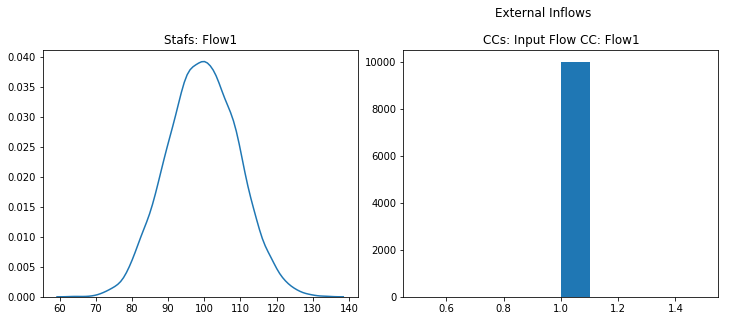

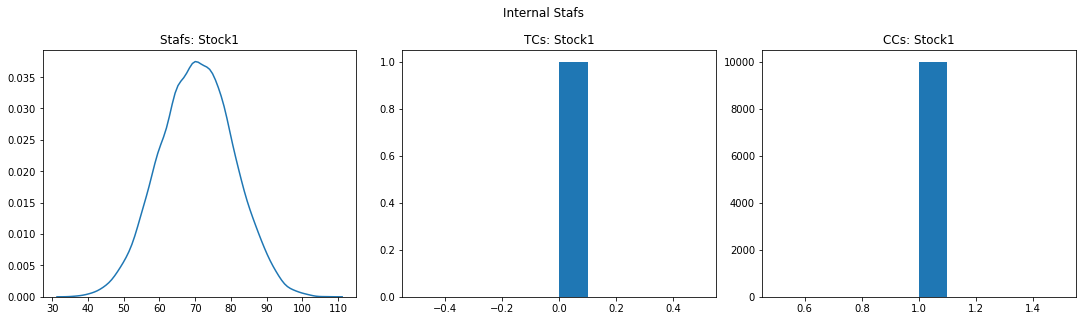

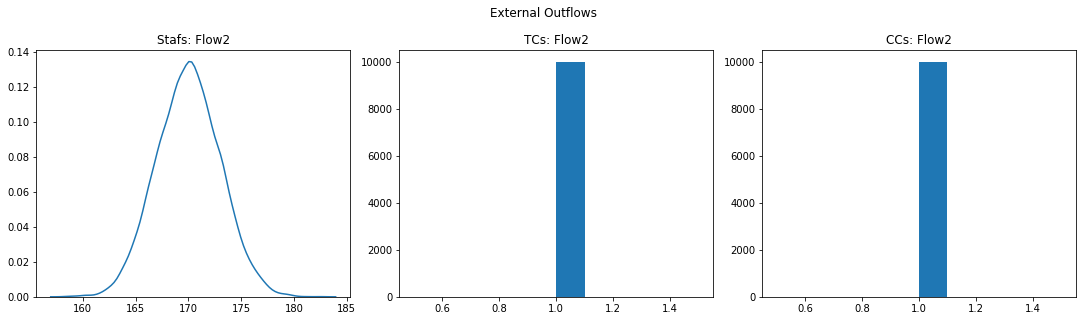

In [9]:
display_parameters(external_inflows, internal_stafs, external_outflows, trace, map_estimate, math_model)